In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/50_Startups.csv')

# Display the first few rows to check the structure
data.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
# Convert 'State' column to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['State'], drop_first=True)

data.head()


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [3]:
# Check for missing values
data.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
Profit,0
State_Florida,0
State_New York,0


In [4]:
# Features (independent variables)
X = data.drop('Profit', axis=1)

# Target variable (dependent variable)
y = data['Profit']


In [5]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [8]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 82010363.04430099
R² Score: 0.8987266414328637


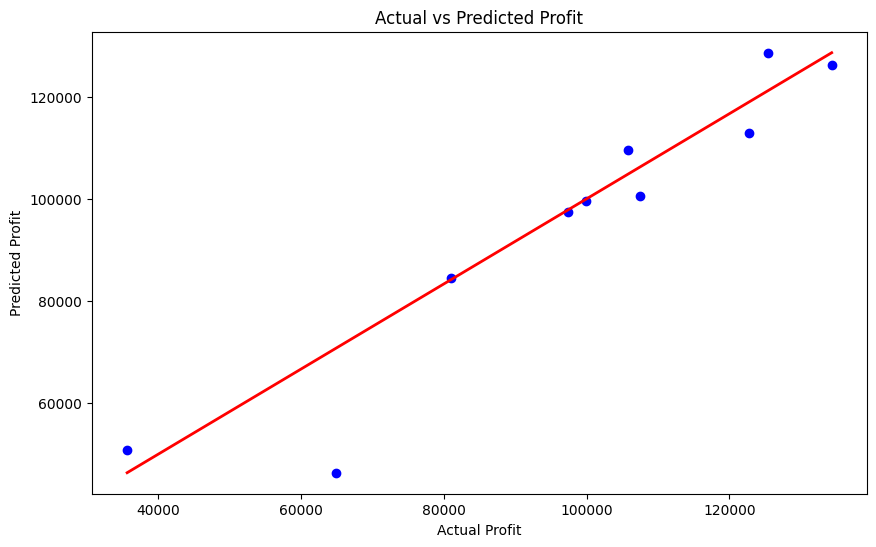

In [9]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)
plt.title("Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.show()


In [10]:
# Create new data with only one row (just one startup)
new_data = pd.DataFrame({
    'R&D Spend': [150000],         # Provide your own value for R&D Spend
    'Administration': [120000],    # Provide your own value for Administration
    'Marketing Spend': [400000],   # Provide your own value for Marketing Spend
    'State_New York': [0],         # Correct encoding for State_New York
    'State_California': [1],       # Correct encoding for State_California
    'State_Florida': [0]           # Correct encoding for State_Florida
})

# Ensure the new data has the same columns as the training data, using X.columns
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Make predictions on the new data
new_predictions = model.predict(new_data)

# Print the predictions
print("Predictions for new data:", new_predictions)


Predictions for new data: [178560.18044675]
